# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

Reporte

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Carga del dataset

In [3]:
datos = pd.read_csv('dataset/mental_health.csv')

Explorando el dataset

In [4]:
(
    datos.head()
)    

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


Imprime la información de las columnas: nombre, datos no nulos y tipo de datos

In [5]:
(
    datos.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

Imprime el número de filas

In [6]:
print(f"Registros (filas): {datos.shape[0]}")

Registros (filas): 1200


Imprime el número de columnas

In [7]:
print(f"Columnas: {datos.shape[1]}")

Columnas: 21


Los datos que predominan son: int64, float64 y object

# Paso 2: Exploración Inicial

Muestra los tipos de variables: tenemos int, float y object

In [8]:
print(datos.dtypes)

Age                                int64
Gender                            object
Education_Level                   object
Employment_Status                 object
Sleep_Hours                      float64
Physical_Activity_Hrs            float64
Social_Support_Score               int64
Anxiety_Score                      int64
Depression_Score                   int64
Stress_Level                       int64
Family_History_Mental_Illness      int64
Chronic_Illnesses                  int64
Medication_Use                    object
Therapy                            int64
Meditation                         int64
Substance_Use                     object
Financial_Stress                   int64
Work_Stress                        int64
Self_Esteem_Score                  int64
Life_Satisfaction_Score            int64
Loneliness_Score                   int64
dtype: object


Imprimimos 5 columnas que podrían ser categóricas

In [9]:
print(datos.select_dtypes(include=['object']).columns)

Index(['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Substance_Use'],
      dtype='object')


Analisando las columnas:

In [10]:
print(datos['Gender'])

0         Male
1       Female
2       Female
3       Female
4       Female
         ...  
1195    Female
1196    Female
1197    Female
1198      Male
1199      Male
Name: Gender, Length: 1200, dtype: object


Gender: Es un columna categórica porque sólo tiene dos valores posibles, masculino o femenino.

In [11]:
print(datos['Education_Level'])

0        Bachelor's
1        Bachelor's
2          Master's
3       High School
4        Bachelor's
           ...     
1195          Other
1196       Master's
1197            PhD
1198          Other
1199          Other
Name: Education_Level, Length: 1200, dtype: object


Education_Level: De igual manera es una variable categórica, ya que representa diferentes categorías del nivel educativo

In [12]:
print(datos['Employment_Status'])

0       Unemployed
1          Retired
2         Employed
3       Unemployed
4          Retired
           ...    
1195       Student
1196      Employed
1197       Retired
1198      Employed
1199      Employed
Name: Employment_Status, Length: 1200, dtype: object


Employment_Status: Es categória porque clasifica a las personas en grupos discretos.

In [13]:
print(datos['Medication_Use'])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1195    Occasional
1196           NaN
1197           NaN
1198           NaN
1199           NaN
Name: Medication_Use, Length: 1200, dtype: object


Medication_Use: Igual es una variable categórica, porque clasifica a las personas sobre el uso de mediamentos

In [14]:
print(datos['Substance_Use'])

0            NaN
1            NaN
2            NaN
3            NaN
4       Frequent
          ...   
1195         NaN
1196         NaN
1197         NaN
1198         NaN
1199    Frequent
Name: Substance_Use, Length: 1200, dtype: object


Substance_Use: Igual es una variable categórica, porque clasifica a las persona por el uso de sustancias.

In [15]:
valores_inconsistentes = (
    datos[
        ['Medication_Use','Substance_Use']
    ]
)
print(valores_inconsistentes.head())

  Medication_Use Substance_Use
0            NaN           NaN
1            NaN           NaN
2            NaN           NaN
3            NaN           NaN
4            NaN      Frequent


Las columnas Medication_Use y Substance_Use son valores inconsistentes porque tienen valores faltantes.

Calculamos las estadísticas básicas: la media, desviación estandar, máximo y minimo

In [16]:
(
    datos.describe()
)

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000
mean,46.317500,6.46900,2.005750,5.055000,10.470000,10.674167,5.000833,0.318333,0.26750,0.210000,0.399167,4.992500,4.889167,5.062500,5.12000,4.959167
std,16.451157,1.52955,2.037818,2.652893,5.911138,5.632889,2.538281,0.466024,0.44284,0.407478,0.489931,2.590953,2.547016,2.531587,2.56991,2.566383
min,18.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,33.000000,5.40000,0.600000,3.000000,5.000000,6.000000,3.000000,0.000000,0.00000,0.000000,0.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,46.000000,6.40000,1.400000,5.000000,10.500000,11.000000,5.000000,0.000000,0.00000,0.000000,0.000000,5.000000,5.000000,5.000000,5.00000,5.000000
75%,61.000000,7.50000,2.700000,7.000000,16.000000,15.000000,7.000000,1.000000,1.00000,0.000000,1.000000,7.000000,7.000000,7.000000,7.00000,7.000000
max,74.000000,12.40000,15.100000,9.000000,20.000000,20.000000,9.000000,1.000000,1.00000,1.000000,1.000000,9.000000,9.000000,9.000000,9.00000,9.000000


Describe el nombre de las columnas

In [17]:
(
datos.columns
)

Index(['Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours',
       'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score',
       'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness',
       'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation',
       'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
       'Life_Satisfaction_Score', 'Loneliness_Score'],
      dtype='object')

Se analizaron los valores atípicos en el dataset utilizando el método Z-score, se identificaron outliers en las variables Sleep_Hours, Physical_Activity_Hrs, al analizar el contexto de los datos se decidió conservar los outliers.

In [18]:
def zscore_outlier_all(datos):
    outliers = {}
    for col in datos.select_dtypes(include=['number']).columns:
        out = []
        m = np.mean(datos[col])
        sd = np.std(datos[col])
        for i in datos[col]:
            z = (i-m) / sd
            if np.abs(z) > 3:
                out.append(i)
        outliers[col] = out         
    
    return outliers

outliers_detectados = zscore_outlier_all(datos)    
  
for col, valores in outliers_detectados.items():
    print(f"Outliers en {col}: {valores}")

Outliers en Age: []
Outliers en Sleep_Hours: [12.4, 11.4]
Outliers en Physical_Activity_Hrs: [8.4, 8.9, 8.2, 13.4, 10.8, 9.3, 8.2, 8.7, 12.1, 8.3, 9.6, 8.5, 14.7, 8.6, 11.2, 10.9, 8.3, 8.8, 9.0, 15.1]
Outliers en Social_Support_Score: []
Outliers en Anxiety_Score: []
Outliers en Depression_Score: []
Outliers en Stress_Level: []
Outliers en Family_History_Mental_Illness: []
Outliers en Chronic_Illnesses: []
Outliers en Therapy: []
Outliers en Meditation: []
Outliers en Financial_Stress: []
Outliers en Work_Stress: []
Outliers en Self_Esteem_Score: []
Outliers en Life_Satisfaction_Score: []
Outliers en Loneliness_Score: []


Visualización de columna Sleep_Hours para ver el comportamiento de los outliers 

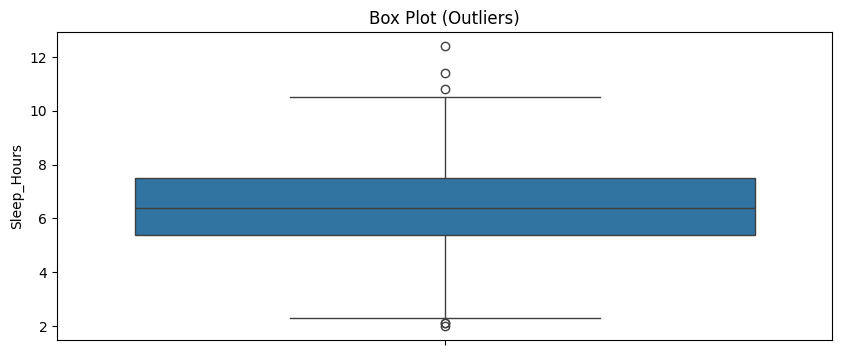

In [19]:
def Box_plot(datos):
    plt.figure(figsize=(10,4))
    plt.title("Box Plot (Outliers)")
    sns.boxplot(datos)
    plt.show()
Box_plot(datos['Sleep_Hours'])    

Visualización de la variable Physical_Activity_Hrs para ver el comportamiento de los outliers

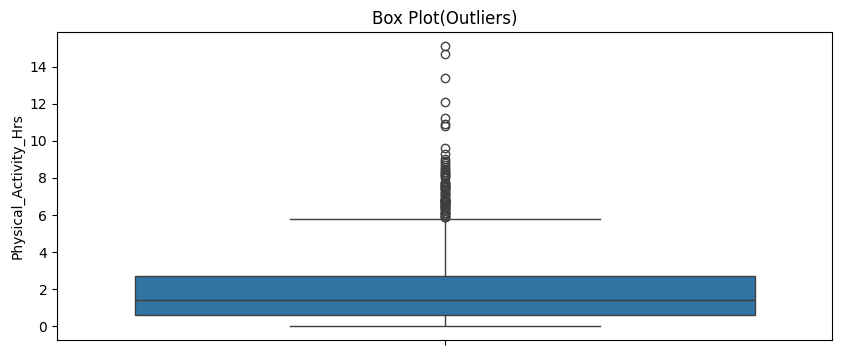

In [20]:
def Box_plot(datos):
    plt.figure(figsize=(10,4))
    plt.title("Box Plot(Outliers)")
    sns.boxplot(datos)
    plt.show()
Box_plot(datos['Physical_Activity_Hrs'])    

# Paso 3: Limpieza de Datos

Hacemos el cálculo del porcentaje por columnas: Observamos que las columnas Medication_Use, Substance_Use tienen valores nulos con un 62.25 %, 69.50 %,  respectivamente.

In [21]:
porcentaje_nulos = (datos.isnull().sum() / len (datos))*100
print("Porcentajes:\n",porcentaje_nulos)

Porcentajes:
 Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64


Hice una copia de la base de datos para poder trabajar con los datos nulos.

In [22]:
datos_cleaned = datos.copy()

Para las dos variables (Medication_Use, Substance_Use ) con datos nulos, se relleno con el valor más frecuente(la moda) de ambas columnas.

In [23]:
datos_cleaned['Substance_Use'] = datos_cleaned['Substance_Use'].fillna(datos_cleaned['Substance_Use'].mode()[0])

In [24]:
datos_cleaned['Medication_Use'] = datos_cleaned['Medication_Use'].fillna(datos_cleaned['Medication_Use'].mode()[0])

In [25]:
valores_modificados = (
    datos_cleaned[
        ['Medication_Use','Substance_Use']
    ]
)
print(valores_modificados.head(30))

   Medication_Use Substance_Use
0         Regular    Occasional
1         Regular    Occasional
2         Regular    Occasional
3         Regular    Occasional
4         Regular      Frequent
5      Occasional    Occasional
6         Regular    Occasional
7         Regular    Occasional
8      Occasional    Occasional
9         Regular    Occasional
10     Occasional    Occasional
11     Occasional      Frequent
12     Occasional    Occasional
13        Regular    Occasional
14        Regular    Occasional
15        Regular      Frequent
16     Occasional    Occasional
17        Regular    Occasional
18        Regular    Occasional
19        Regular    Occasional
20        Regular    Occasional
21        Regular      Frequent
22        Regular    Occasional
23        Regular    Occasional
24     Occasional    Occasional
25        Regular    Occasional
26     Occasional    Occasional
27     Occasional    Occasional
28        Regular    Occasional
29     Occasional    Occasional


Tome la desición de remplazar los valores nulos con la moda, ya que es un buen sustituto porque refleja el valor que más se repite y que probablemente tenga más sentido en términos del comportamiento de los datos.

# Paso 4: Análisis Estadístico

In [26]:
estadisticos = datos_cleaned.groupby("Gender")[["Anxiety_Score", "Depression_Score", "Stress_Level"]].agg(["mean", "std", "median"])
print(estadisticos)

           Anxiety_Score                  Depression_Score                   \
                    mean       std median             mean       std median   
Gender                                                                        
Female         10.741652  5.875621   11.0        10.490334  5.672114   11.0   
Male           10.167308  5.983671   10.0        10.771154  5.582412   11.0   
Non-Binary     10.644444  5.591549   11.0        11.111111  5.434894   12.0   
Other           9.857143  6.405355   10.0        11.380952  6.763699   13.0   

           Stress_Level                   
                   mean       std median  
Gender                                    
Female         4.927944  2.552976    5.0  
Male           5.048077  2.548111    5.0  
Non-Binary     5.122222  2.378876    5.0  
Other          5.285714  2.667262    6.0  


1.- Mayor variabilidad: El grupo "Other" tiene la mayor variabilidad en todos los puntajes (ansiedad, depresión, estrés).

2.- Diferencia entre media y mediana: En ansiedad y depresión, la media tiende a ser menor que la mediana, lo que sugiere que las distribuciones están sesgadas a la izquierda.

3.- Distribución simétrica: El puntaje de estrés muestra distribuciones más simétricas, ya que la media y la mediana son iguales en todos los grupos.

# Paso 5: Fltrado de Datos

Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). 


Luego, clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) y analiza cómo varía el nivel de estrés en cada grupo.

Se verifica a las personas que tienen un puntaje alto de ansiedad.

In [27]:
ansiedad_alta = datos_cleaned.loc[datos_cleaned['Anxiety_Score'] > 80]
ansiedad_alta

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score


Se obtuvieron 0 personas con un puntaje de ansiedad mayor a 80

De modo que, las clasificaciones de las personas según las horas de sueño (menos de 5, entre 5 y 7, más de 7) con el nivel de ansiedad dará cero.

De igual manera al analizar el nivel de estrés en cada categoría va dar cero.

Preguntas:

    ¿Qué porcentaje del total presenta niveles altos de ansiedad?
    De los 1200 personas, 0 tienen ansiedad alta mayor a 80.

    ¿Existe una relación visible entre las horas de sueño y el nivel de estrés?
Respecto a la existencia de relación, no se puede ver por el nivel escogido de 80.

# Paso 6: Ordenamiento

Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?

In [32]:
satisfaccion_vida = ( datos_cleaned.sort_values(by=['Life_Satisfaction_Score', 'Loneliness_Score'],ascending=[False, True])
)

satisfaccion_vida.head(10)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
14,53,Male,Bachelor's,Employed,4.9,1.5,5,17,4,6,...,0,Regular,0,1,Occasional,8,4,6,9,1
33,44,Male,Bachelor's,Employed,7.2,1.7,3,4,4,8,...,0,Regular,0,0,Occasional,6,6,7,9,1
83,61,Female,PhD,Unemployed,5.7,1.8,4,17,20,9,...,0,Regular,0,1,Occasional,7,8,6,9,1
92,31,Female,PhD,Employed,6.8,0.4,8,20,18,5,...,0,Regular,0,0,Occasional,1,5,4,9,1
103,43,Female,Other,Student,5.5,5.1,9,12,6,6,...,0,Occasional,1,0,Occasional,6,8,8,9,1
217,25,Female,Master's,Employed,6.9,3.4,4,15,5,1,...,0,Regular,0,0,Occasional,3,5,6,9,1
262,49,Female,High School,Retired,3.6,0.7,6,14,15,6,...,0,Regular,0,0,Occasional,3,2,4,9,1
391,44,Other,PhD,Retired,7.4,2.4,4,7,7,4,...,1,Regular,1,0,Occasional,3,4,3,9,1
438,41,Female,Master's,Employed,5.4,0.2,1,18,9,8,...,0,Regular,0,1,Occasional,2,6,4,9,1
675,29,Male,Other,Unemployed,8.0,0.4,3,7,9,8,...,0,Regular,0,0,Occasional,8,5,5,9,1


Preguntas:

    ¿Qué características comunes encuentras en estas 10 personas?

1.- Diversidad en edad y género

    Edades entre 25 y 61 años.

    Predominancia de mujeres (6 de 10).

2.- Nivel educativo alto

    La mayoría tienen educación universitaria (Bachelor’s, Master's o PhD).

    Solo una persona tiene nivel de High School.

3.- Estado laboral variado

    Hay empleados, desempleados, estudiantes y retirados.

    Más de la mitad están empleados.


4.- Puntajes de ansiedad, depresión y estrés

    Algunos tienen puntajes altos de ansiedad y depresión.

    Estrés en rangos de 1 a 9, con varios en niveles medios.

5.- Apoyo social y autoestima

    Variabilidad en el puntaje de apoyo social (1 a 9).

    Autoestima generalmente entre 3 y 8.

6.- Uso de medicación y terapia

    La mayoría usa medicación regularmente.


7.- Prácticas de bienestar

    Algunos practican meditación.

    Todos reportan algún nivel de consumo de sustancias, generalmente ocasional.

8.- Estrés financiero y laboral

    El estrés financiero y laboral varía, pero en general no es excesivo.







    ¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?

Con base en los datos proporcionados, donde todas las personas tienen una satisfacción con la vida de 9 y una soledad baja (generalmente 1), se pueden plantear la siguiente hipótesis sobre el vínculo entre satisfacción con la vida y soledad:
Hipótesis posible

    Relación inversa entre satisfacción con la vida y soledad

        Hipótesis: A menor sensación de soledad, mayor satisfacción con la vida.

        Justificación: La mayoría de los individuos reportan baja soledad (1), lo que podría indicar que contar con redes de apoyo y compañía mejora la percepción general de bienestar.

# Paso 7: Guardado de Resultados

Filtra el dataset para encontrar a las personas que reciben terapia y que además tienen un nivel bajo de estrés (por debajo de la mediana). Una vez que tengas este subconjunto, guarda la información en un nuevo archivo CSV para tenerlo listo para futuros análisis.

Realizamos el cálculo de la mediana de la variable Stress_Level del dataframe datos_cleaned

In [35]:
mediana_estres = datos_cleaned['Stress_Level'].median()
print(f"La median de la variable Stress_Level es: {mediana_estres:.2f}")

La median de la variable Stress_Level es: 5.00


Hacemos el filtro para las personas que reciben terapia y tienen un nivel de estrés bajo.

In [ ]:
filtro_estres = datos_cleaned.loc[(datos_cleaned['Therapy']== 1) & (datos_cleaned['Stress_Level'] < mediana_estres)]
filtro_estres.shape


(108, 21)

In [38]:
filtro_estres.head(10)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,Regular,1,1,Frequent,8,9,5,7,7
12,41,Female,PhD,Employed,9.4,1.3,3,11,7,2,...,0,Occasional,1,0,Occasional,4,1,2,8,5
22,61,Female,High School,Employed,8.3,7.6,6,6,15,3,...,0,Regular,1,0,Occasional,3,6,4,4,7
34,59,Female,Master's,Student,6.6,0.8,8,2,1,4,...,0,Regular,1,0,Occasional,2,1,6,3,9
40,61,Male,PhD,Unemployed,7.1,3.4,8,17,8,3,...,0,Occasional,1,1,Occasional,4,3,2,8,7
42,69,Non-Binary,High School,Employed,9.1,1.0,2,1,16,4,...,1,Regular,1,0,Occasional,1,8,8,7,1
50,56,Female,Bachelor's,Employed,4.8,0.4,8,9,16,2,...,1,Regular,1,0,Occasional,7,1,3,8,4
52,21,Female,PhD,Unemployed,7.4,0.4,7,16,7,3,...,0,Occasional,1,0,Occasional,3,7,4,6,6
55,67,Female,Master's,Unemployed,5.6,2.0,6,15,11,2,...,1,Regular,1,0,Occasional,2,6,8,7,3
62,64,Female,PhD,Employed,6.2,2.2,6,10,19,4,...,0,Regular,1,0,Occasional,7,6,7,3,1


Guardando el dataset creado

In [39]:
filtro_estres.to_csv('dataset/filtro_estres.csv', index=False)

Analizamos las personas por género.

In [40]:
personas_estres = filtro_estres['Gender'].value_counts()
personas_estres

Gender
Female        54
Male          46
Non-Binary     7
Other          1
Name: count, dtype: int64

Personas con la misma condición pero usan medicamentos

In [41]:
uso_medicamentos = filtro_estres['Medication_Use'].value_counts()
uso_medicamentos

Medication_Use
Regular       89
Occasional    19
Name: count, dtype: int64

Se hace el conteo de las personas que cumplen la condición y usan sustancias.

In [42]:
uso_sustancias = filtro_estres['Substance_Use'].value_counts()
uso_sustancias

Substance_Use
Occasional    97
Frequent      11
Name: count, dtype: int64

Para ver el análsis que existen en relación con las variables, se hace una matriz de correlación

In [43]:
columnas_numericas = filtro_estres.select_dtypes(include=['number'])
matriz_corr = columnas_numericas.corr()

creamos el mapa de calor de la matriz

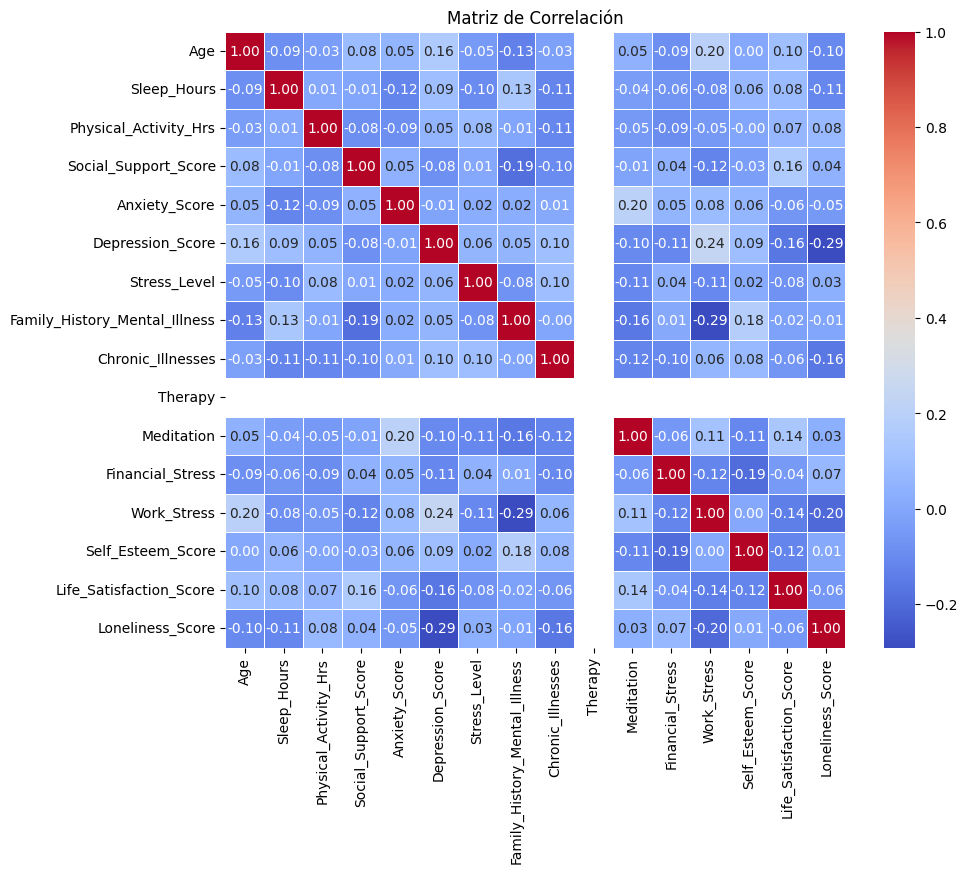

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Preguntas:

    ¿Cuántas personas cumplen con ambas condiciones?
Del total de personas, 108 cumplen la condición de recibir y tener niveles de estrés por debajo de la mediana

    ¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?
1.-  Entre el 10 % del total de las personas van a terapia y su nivel de estrés se encuentra por debajo de la mediana.

2.- 97 personas utilizan ocacionalmente el uso de sutancias.